Kullanacağımız veri setlerini içe aktaralım. 

In [1]:
import pandas as pd

banking_dirty = pd.read_csv("banking_dirty.csv")
exercises = pd.read_csv("exercises.csv")

Kod bloklarından elde edilen çıktıları birbirinden ayırmak için ayrac() isimli bir fonksiyon oluşturalım.

In [2]:
def ayrac():
    print("\n*****\n")

DataFramelerine bir göz atalım.

In [3]:
print(banking_dirty.head(3))
ayrac()
print(exercises.head(3))

   Unnamed: 0   cust_id  birth_date  Age  acct_amount  inv_amount   fund_A  \
0           0  870A9281  1962-06-09   58     63523.31       51295  30105.0   
1           1  166B05B0  1962-12-16   58     38175.46       15050   4995.0   
2           2  BFC13E88  1990-09-12   34     59863.77       24567  10323.0   

   fund_B  fund_C   fund_D account_opened last_transaction  
0  4138.0  1420.0  15632.0       02-09-18         22-02-19  
1   938.0  6696.0   2421.0       28-02-19         31-10-18  
2  4590.0  8469.0   1185.0       25-04-18         02-04-18  

*****

   type_sports  exercise
0   car racing       1.0
1  Basketball        1.0
2         none       2.0


# ADVENCED DATA PROBLEMS (İleri Düzey Veri Problemleri)

Değerlerin doğru bir şekilde eklendiğini ve eksik değerlerin (Missing Values) analizlerimizi olumsuz etkilemediğini doğrulamayı öğreneceğiz. Ayrıca ağırlıkların, pound yerine kg yazma gibi gibi şeyleri de göreceğiz.

+ Uniformity (Tekdüzelik)
+ Cross field validation (Alanlar arası doğrulama)
+ Missing data (Kayıp veri)

##  Uniformity (Tekdüzelik)  

Tekdüzelik, aynı out of range (aralık dışı) veriler gibi analizimizi çarpıtabilecek bir problemdir. Örneğin:

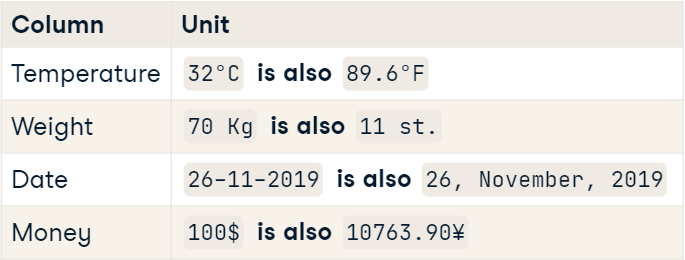

Tekdüzeliğin doğrulanması, doğru analiz yapmak için zorunludur. 

### < Uniform Currencies (Tekdüze Para Birimleri) > 

banking_dirty adlı veri setinde, **acct_amount =** hesaplarda depolanan para miktarını, **acct_cur =** Amerika ve Avrupa şubelerinden konsolide edilen para birimi, **inv_amount =** yatırılan tutar, **account_opened =** hesap açılış tarihi, **last_transaction =** son işlem tarihi sütunları mevcuttur.

Ortalama hesap boyutunu ve yatırımların hesap boyutuna göre nasıl değiştiğini anlamaya çalışacağız. Ancak bundan önce para birimi tutarını dolar olarak birleştirmemiz gerekecek. 

In [4]:
print(banking_dirty.head())

   Unnamed: 0   cust_id  birth_date  Age  acct_amount  inv_amount   fund_A  \
0           0  870A9281  1962-06-09   58     63523.31       51295  30105.0   
1           1  166B05B0  1962-12-16   58     38175.46       15050   4995.0   
2           2  BFC13E88  1990-09-12   34     59863.77       24567  10323.0   
3           3  F2158F66  1985-11-03   35     84132.10       23712   3908.0   
4           4  7A73F334  1990-05-17   30    120512.00       93230  12158.4   

    fund_B   fund_C   fund_D account_opened last_transaction  
0   4138.0   1420.0  15632.0       02-09-18         22-02-19  
1    938.0   6696.0   2421.0       28-02-19         31-10-18  
2   4590.0   8469.0   1185.0       25-04-18         02-04-18  
3    492.0   6482.0  12830.0       07-11-17         08-11-18  
4  51281.0  13434.0  18383.0       14-05-18         19-07-18  


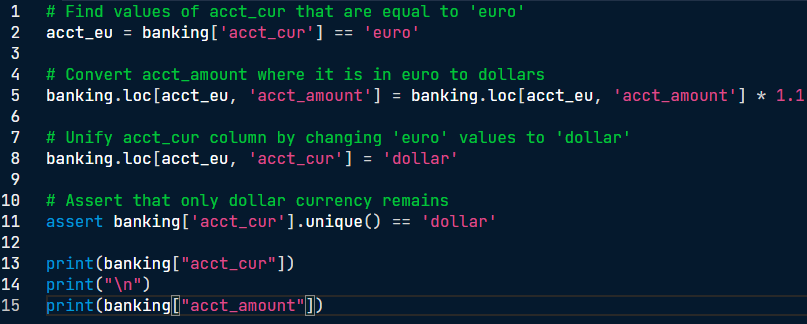

+ **acct_eu = banking["acct_cur"] == "euro"** komutu, banking veri setinin **acct_cur** sütunundaki euro değerine sahip satırları **acct_eu** değişkenine atadı.


+ **banking.loc[acct_eu, "acct_amount"] = banking.loc[acct_eu, "acct_amount"] * 1.1** komutu, banking veri setindeki acct_cur sütunundaki euro olan satırlarının denk geldiği **acct_amount** sütunundaki değerleri **1.1** ile çarparak dolar kuruna dönüştürmüş oldu. Böylece **acct_amount** sütunundaki tüm değerler dolar kuruna ait değerler olmuş oldu.


+ **banking.loc[acct_eu, "acct_cur"] = "dollar"** komutu, **acct_cur** sütunundaki euro olan satırları dollar ile değiştirdi. 

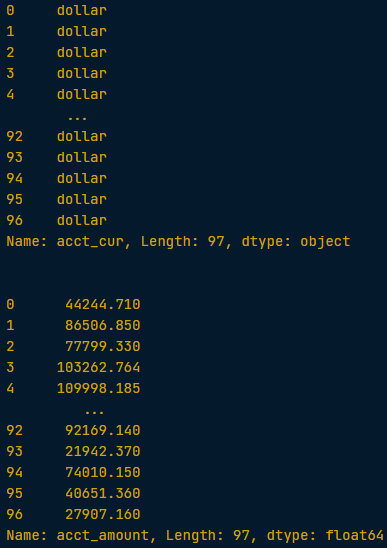

### < Uniform Dates (Tekdüze Tarihler) >

Müşterilerin her yıl hesaplarının büyüklüğü göz önüne alındığında paralarını nasıl yatırdıklarını görmeye çalışalım. **account_opened** sütunu müşterilerin hesaplarını ne zaman açtıklarını gösterir ve zaman içinde müşteri etkinliğini ve yatırımını bölümlere ayırmak için iyi bir temsilidir. Bu sütunu bir **datetime** nesnesine dönüştürerek, biçimin anlaşıldığından ve olası yanlış biçimlerin eksik olarak ayarlandığından emin olarak yapacağız.

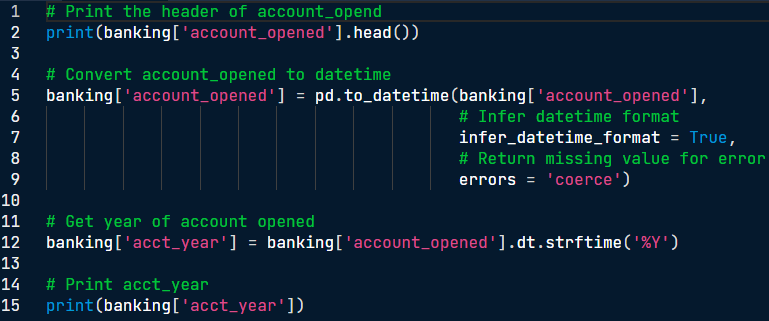

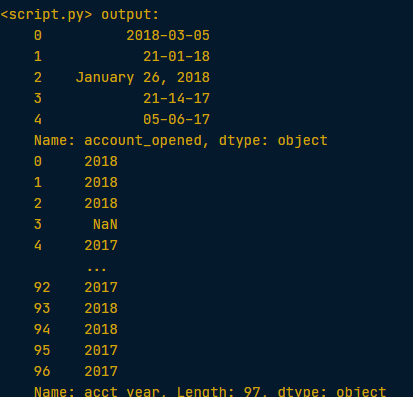

##  Cross Field Validation (Alanlar Arası Doğrulama) 

Verilerimizin bütünlüğünü sağlıklı bir şekilde kontrol etmek için veri kümemizdeki birçok alanın kullanılmasıdır. Alanlar arası doğrulama ile tutarsızlıkları tespit ettiğimizde ne yapılabilir: 

+ Droppping data (Veriyi bırakmak)
+ Set to missing and impute 
+ Apply rules from domain knowledge  

banking_dirty veri setinde, farklı yaş gruplarındaki müşterilerin nasıl yatırım yaptığını anlamak istiyoruz. Ancak, önce analiz ettiğiniz verilerin doğru olduğundan emin olmamız lazım. Bunu, farklı fonlara yatırılan tutara ve müşterilerin doğum günlerine göre **inv_amount** ve age değerlerini çapraz alan kontrolü yaparak yapacağız.

In [5]:
#1
print(banking_dirty[["fund_A", "fund_B", "fund_C", "fund_D", "inv_amount"]])

ayrac()

#2
fund_columns = ["fund_A", "fund_B", "fund_C", "fund_D"]
inv_equ = banking_dirty[fund_columns].sum(axis = 1) == banking_dirty["inv_amount"]
print(inv_equ)

ayrac()

#3 
consistent_inv = banking_dirty[inv_equ]
inconsistent_inv = banking_dirty[~inv_equ]
print(consistent_inv)
ayrac()
print(inconsistent_inv)

ayrac()

#4
print("Tutarsız yatırım sayısı:", inconsistent_inv.shape[0])

     fund_A   fund_B   fund_C   fund_D  inv_amount
0   30105.0   4138.0   1420.0  15632.0       51295
1    4995.0    938.0   6696.0   2421.0       15050
2   10323.0   4590.0   8469.0   1185.0       24567
3    3908.0    492.0   6482.0  12830.0       23712
4   12158.4  51281.0  13434.0  18383.0       93230
..      ...      ...      ...      ...         ...
95    190.0    931.0   1451.0   4943.0        7515
96   2453.0   7892.0  31486.0   7258.0       49089
97   3352.0   7547.0   8486.0   8577.0       27962
98   1758.0  11174.0  11650.0   5080.0       29662
99   2184.0  17918.0   6714.0   5333.0       32149

[100 rows x 5 columns]

*****

0      True
1      True
2      True
3      True
4     False
      ...  
95     True
96     True
97     True
98     True
99     True
Length: 100, dtype: bool

*****

    Unnamed: 0   cust_id  birth_date  Age  acct_amount  inv_amount   fund_A  \
0            0  870A9281  1962-06-09   58     63523.31       51295  30105.0   
1            1  166B05B0  1962-12

+ 1-) A, B, C ve D fonlarına yapılan yatırımlar ve bu yatırımların toplamanı içeren **inv_amount** sütunlarını döndürdük.


+ **fund_columns = ["fund_A", "fund_B", "fund_C", "fund_D"]** fonlara yapılan yatırımların olduğu sütunları **fund_columns** adlı listede topladık. 

  **inv_equ = banking_dirty[fund_columns].sum(axis = 1) == banking_dirty["inv_amount"]** fund_columns'daki her bir satırdaki değerleri toplayıp inv_amount'a eşit gelip gelmediğini sorguladı ve **inv_equ** değişkenine True veya False olarak atadı. Yani böylece, fonlara yapılan yatırımların toplamı, inv_amount sütununa eşitse True, değilse False olan satırlar elde edildi. **axis = 1** parametresi, değerlerin satır satır toplanmasını sağladı. Yani **fund_A + fund_B + fund_C + fund_D** olarak toplandı.
  
  
+ **consistent_inv = banking_dirty[inv_equ]** tutarlı olan satırları consistent_inv adlı değişkene atadı.

  **inconsistent_inv = banking_dirty[~inv_equ]** tutarsız olan satırları inconsistent_inv adlı değişkene atadı. Tutarsız olanları seçmemizi, **( ~ )** operatörü sağladı. 

## Missing Data (Kayıp Veri)

Bu bölümde kullandığımız işlevler ve tutorial linkleri : 

+ pandas.DataFrame.isna() = https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html


+ missingno.matrix() = https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/


+ pandas.DataFrame.dropna() = https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html


+ pandas.DataFrame.fillna() = https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

Bu bölümde **Missing Data (Kayıp Veri)** sorunu üzerine odaklanacağız. 

Missing Data, bir gözlemdeki bir değişken için hiçbir veri değerinin depolanmamasıdır. **NA, NaN** şeklinde temsil edilir. Missing Value (kayıp değer)'in çeşitleri vardır: 

+ Missing Completely at Random (Rastgele olarak tamamen eksik) = Kayıp veriler ve diğer verileri arasında herhangi bir sistematik ilişiki yoktur.


+ Missing at Random (Rastgele eksik) = Gözlemlenen veriler ile kayıp veriler araısında sistematik bir ilişki vardır. 


+ Missing Not at Random (Rasgele olmayarak eksik) = Gözlemlenmeyen veriler ile kayıp veriler arasında sistematik bir ilişki vardır.


Missing value (kayıp veri)'lerle nasıl başa çıkılabilir:

+ Drop missing data (Kayıp verileri bırakmak)


+ Impute with statistical measures (mean, median, mode..) (Medyan, mod gibi istatistiksel ölçülerle yüklemek)


+ Imputing using an algorithmic approach (Algoritmik bir yaklaşım ile impute etmek)


+ Impute with machine learning models (Makine öğrenmesi modelleri ile impute etmek)


**Her bir eksiklik türü, belirli bir yaklaşım gerektirir ve her bir yaklaşımın avantajları ve dezavantajları vardır.**

exercises veri setindeki sütunların hangilerin missing value olduğunu **isna()** işlevi ile görelim. Kaç tane olduğunu da **isna().sum()** ile görelim.

In [6]:
print(exercises.isna())
ayrac()
print(exercises.isna().sum())

     type_sports  exercise
0          False     False
1          False     False
2          False     False
3           True     False
4          False     False
..           ...       ...
120        False     False
121        False     False
122        False     False
123         True     False
124         True     False

[125 rows x 2 columns]

*****

type_sports    21
exercise       13
dtype: int64


Missing value'ları görselleştirerek daha iyi anlayalım. **missingo** modülünün **matrix()** işlevi ile gerçekleştiriyoruz. 

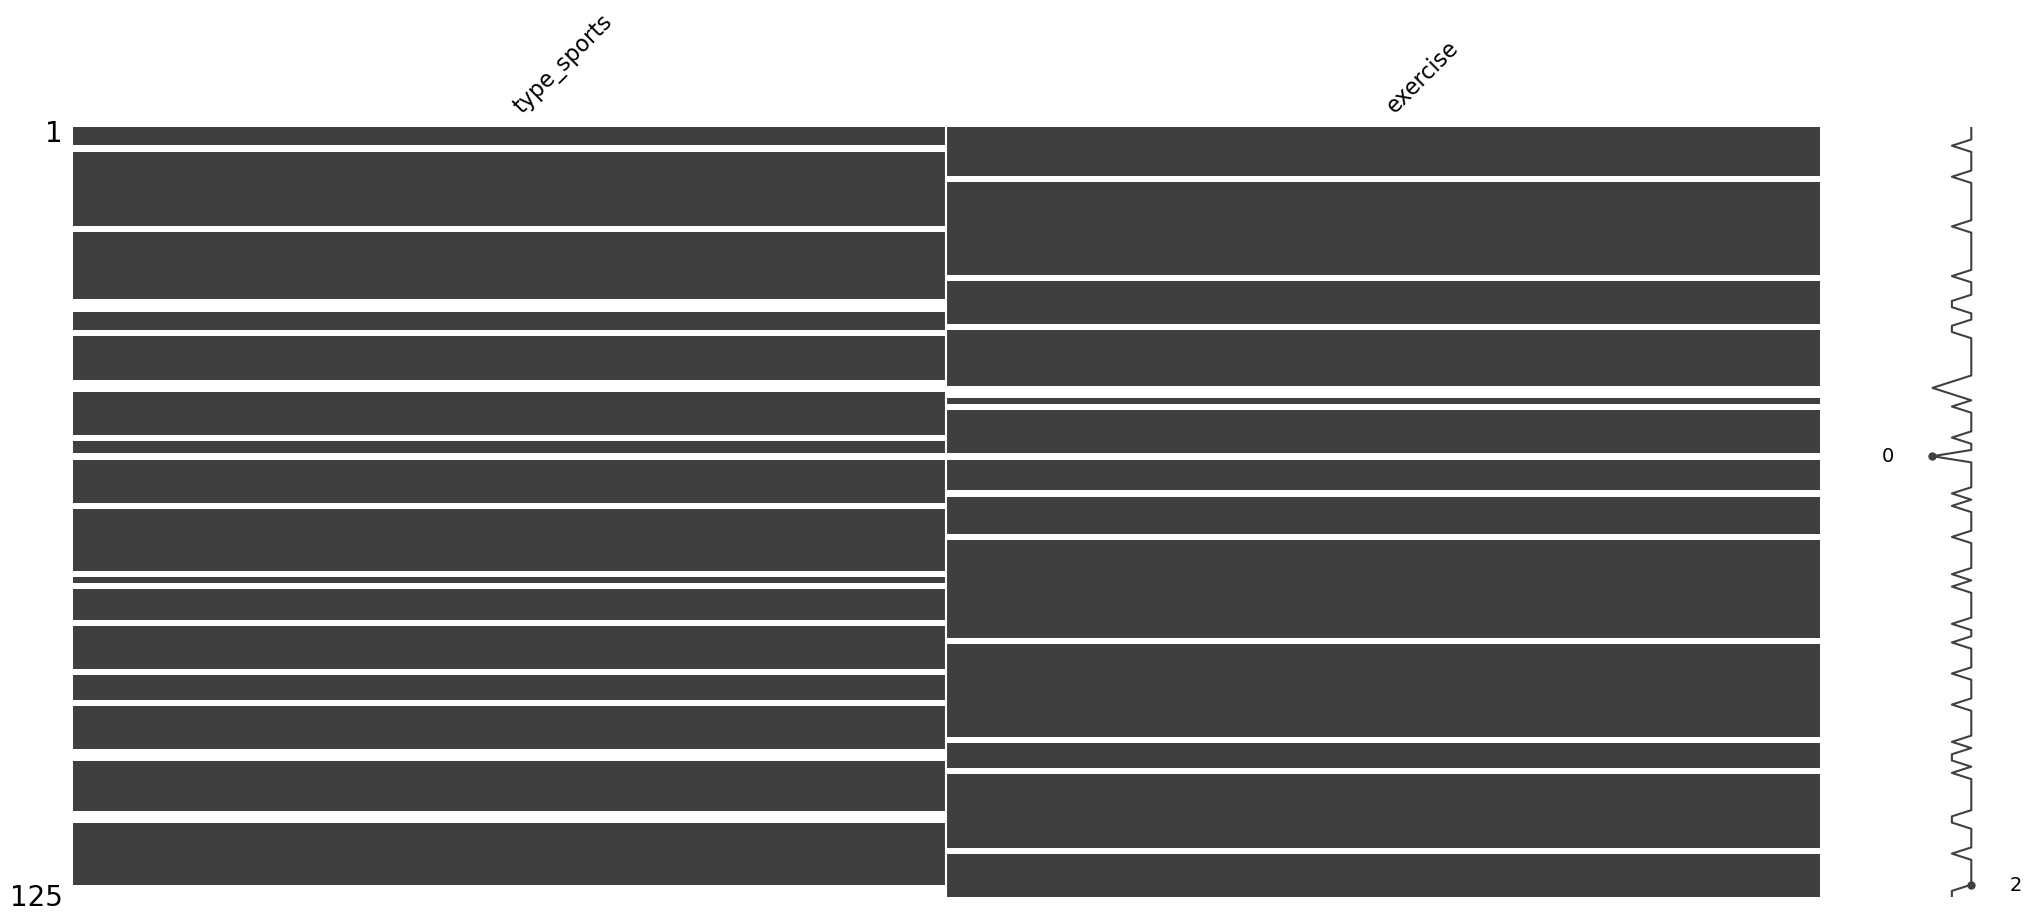

In [7]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(exercises)
plt.show()

+ Beyaz çizgiler, kayıp verileri temsil eder. Nerede, ne kadar kayıp veri olduğunu bu şekilde görmemize yardımcı olur.

+ NOT: Eğer missingno modülü bilgisayarınızda yüklü değilse bu komut indirmenize yardımcı olabilir = **conda install -c conda-forge/label/gcc7 missingno**

Öncelikle **missing** değişkenine **exercise** sütunundaki eksik değerlerin olduğu satırları ataylım. **complete** değişkenine de eksik olmayan satırları atayalım. Dataframe olarak atanmaları için **xx[xx[...]]** şeklinde yazacağız.

In [8]:
missing = exercises[exercises["exercise"].isna()]
complete = exercises[~exercises["exercise"].isna()]

print(missing)
ayrac()
print(complete)

                   type_sports  exercise
8                         none       NaN
24                        none       NaN
32                      Soccer       NaN
42                         NaN       NaN
43   no particular engagement        NaN
45                        none       NaN
53                         NaN       NaN
59                     skiing        NaN
66                    tennis         NaN
83               Marching Band       NaN
99                    softball       NaN
104         None at the moment       NaN
117    No, I don't play sport.       NaN

*****

     type_sports  exercise
0     car racing       1.0
1    Basketball        1.0
2           none       2.0
3            NaN       3.0
4       Softball       1.0
..           ...       ...
120     Softball       2.0
121  basketball        2.0
122         none       2.0
123          NaN       1.0
124          NaN       2.0

[112 rows x 2 columns]


Oluşturduğumuz 2 veri setinin de istatistiksel değerlerini **describe()** ile döndürelim.

In [9]:
print(missing.describe())
ayrac()
print(complete.describe())

       exercise
count       0.0
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN

*****

         exercise
count  112.000000
mean     1.589286
std      0.665137
min      1.000000
25%      1.000000
50%      1.000000
75%      2.000000
max      3.000000


### < Drop Missing Values (Kayıp Verileri Bırakma) >

exercises veri setine tekrar bir göz atalım. 

In [10]:
print(exercises)

     type_sports  exercise
0     car racing       1.0
1    Basketball        1.0
2           none       2.0
3            NaN       3.0
4       Softball       1.0
..           ...       ...
120     Softball       2.0
121  basketball        2.0
122         none       2.0
123          NaN       1.0
124          NaN       2.0

[125 rows x 2 columns]


**dropna()** işlevi ile eksik değerlerin olduğu satırları bırakabiliriz. Kayıp verileri bırakmadan önce bıraktıktan sonraki sayılarını da **isna().sum()** ile gösterelim.

In [11]:
print("Kayıp veriler bırkılmadan önce exercise sütunundaki nan sayısı :",exercises["exercise"].isna().sum())
exercises_dropped = exercises.dropna(subset = ["exercise"])
print("Kayıp veriler bırakıldıktan sonra exercise sütunundaki nan sayısı :",exercises_dropped["exercise"].isna().sum())

Kayıp veriler bırkılmadan önce exercise sütunundaki nan sayısı : 13
Kayıp veriler bırakıldıktan sonra exercise sütunundaki nan sayısı : 0


### < Impute With Statistical Measures (İstatistiksel Ölçülerle Yüklemek)  >

Bu yol, kayıp değerleri ortalama, mod ya da medyan gibi istatistiksel değerlerle değiştirmektir. Böylece az bir hata ile veri kaybı yaşamadan analiz yapabiliriz. 

**exercise** sütunundaki kayıp verileri, bu sütunun ortalamasıyla **fillna()** işlevini kullanarak değiştirelim. 

In [12]:
print(exercises["exercise"].isna().sum())
ayrac()

exercise_mean = exercises["exercise"].mean()
print(exercise_mean)
ayrac()

exercises_imputed = exercises.fillna({"exercise" : exercise_mean})
print(exercises_imputed.isna().sum())
ayrac()
print(exercises_imputed["exercise"].mean())

13

*****

1.5892857142857142

*****

type_sports    21
exercise        0
dtype: int64

*****

1.5892857142857142
